# New Approach to Space Time Singularities by Susan Scott
##  Geoff Cope
##  Univeristy of Utah
##  December 25, 2021

https://digital.library.adelaide.edu.au/dspace/bitstream/2440/19586/2/02whole.pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [3]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
t,r,z,phi,dt,dr,dz,dphi = symbols('t r z phi dt dr dz dphi')

In [6]:
Lambda = Function('lambda')(r,z)
Lambda

In [7]:
nu = Function('nu')(r,z)
nu

In [8]:
variables = Matrix( [t,r,z,phi] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢z⎥
⎢ ⎥
⎣φ⎦

In [9]:
differentials = Matrix( [dt,dr,dz,dphi] )
differentials

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢ dz ⎥
⎢    ⎥
⎣dphi⎦

In [11]:
lineElement = expand(- exp(2*Lambda)*dt**2 + exp(2**nu-Lambda)*(dr**2 + dz**2 ) + r**2 * exp(-2*Lambda) * dphi**2  )
lineElement

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅λ(r, z)                                                              ⎤
⎢-ℯ                     0                      0                  0       ⎥
⎢                                                                         ⎥
⎢              ⎛ ν(r, z)⎞                                                 ⎥
⎢              ⎝2       ⎠  -λ(r, z)                                       ⎥
⎢     0       ℯ          ⋅ℯ                    0                  0       ⎥
⎢                                                                         ⎥
⎢                                     ⎛ ν(r, z)⎞                          ⎥
⎢                                     ⎝2       ⎠  -λ(r, z)                ⎥
⎢     0                 0            ℯ          ⋅ℯ                0       ⎥
⎢                                                                         ⎥
⎢                                                            2  -2⋅λ(r, z)⎥
⎣     0                 0                      0            r ⋅ℯ          ⎦

In [13]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡  2⋅λ(r, z)                                                              ⎤
⎢-ℯ                     0                      0                  0       ⎥
⎢                                                                         ⎥
⎢              ⎛ ν(r, z)⎞                                                 ⎥
⎢              ⎝2       ⎠  -λ(r, z)                                       ⎥
⎢     0       ℯ          ⋅ℯ                    0                  0       ⎥
⎢                                                                         ⎥
⎢                                     ⎛ ν(r, z)⎞                          ⎥
⎢                                     ⎝2       ⎠  -λ(r, z)                ⎥
⎢     0                 0            ℯ          ⋅ℯ                0       ⎥
⎢                                                                         ⎥
⎢                                                            2  -2⋅λ(r, z)⎥
⎣     0                 0                      0            r ⋅ℯ          ⎦

In [15]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("t r z phi")
t,r,z,phi = syms

In [17]:
metric = MetricTensor(m,syms)

In [18]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                            ⎡    ν(r, z)                                                                            
⎢                                            ⎢ - 2        + 3⋅λ(r, z) ∂                                                              
⎢                                            ⎢ℯ                      ⋅──(λ(r, z))                      0                             
⎢                                            ⎢                        ∂r                                                             
⎢⎡             ∂            ∂             ⎤  ⎢                                                                                       
⎢⎢     0       ──(λ(r, z))  ──(λ(r, z))  0⎥  ⎢                                      ν(r, z)        ∂             ∂              ν(r, 
⎢⎢             ∂r           ∂z            ⎥  ⎢                                     2       ⋅log(2)⋅──(ν(r, z))   ──(λ(r, z))   2     
⎢⎢                                        ⎥  ⎢                

In [19]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡⎛    2                2                       ⎞     ν(r, z)                                                                         
⎢⎜   ∂                ∂             ∂          ⎟  - 2        + 3⋅λ(r, z)                                                             
⎢⎜r⋅───(λ(r, z)) + r⋅───(λ(r, z)) + ──(λ(r, z))⎟⋅ℯ                                                                                   
⎢⎜    2                2            ∂r         ⎟                                                                                     
⎢⎝  ∂r               ∂z                        ⎠                                                                                     
⎢───────────────────────────────────────────────────────────────────────                                                             
⎢                                   r                                                                                                
⎢                                                             

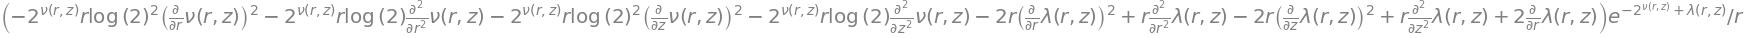

In [20]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [21]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡⎛    2                2                       ⎞     ν(r, z)                   ⎛                                  2                  
⎢⎜   ∂                ∂             ∂          ⎟  - 2        + 3⋅λ(r, z)       ⎜   ν(r, z)      2    ⎛∂          ⎞     ν(r, z)       
⎢⎜r⋅───(λ(r, z)) + r⋅───(λ(r, z)) + ──(λ(r, z))⎟⋅ℯ                         0.5⋅⎜- 2       ⋅r⋅log (2)⋅⎜──(ν(r, z))⎟  - 2       ⋅r⋅log(
⎢⎜    2                2            ∂r         ⎟                               ⎜                     ⎝∂r         ⎠                   
⎢⎝  ∂r               ∂z                        ⎠                               ⎝                                                     
⎢─────────────────────────────────────────────────────────────────────── + ──────────────────────────────────────────────────────────
⎢                                   r                                                                                                
⎢                                                             

In [22]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                             

In [23]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                             